# Digit Recognition
![Image of machine learniing](https://cdn-images-1.medium.com/max/1200/1*M9le42saJxWlOYyYvhKtPA.jpeg)


## Contents

1. Introduction to supervised machine learning
2. The task
3. MNIST
4. Keras
5. First Trial
6. Second Trial
7. Third Trial
8. Results and Conclusion
9. References

## Introduction to supervised machine learning

**Supervised machine learning [1]** is when an algorithm recieves an input, and figures out a way to map those inputs to an output. A simple formula would be $y = f(x)$ where x are the input variables, and y are the output variables.

The reason why its "supervised" is because the algorithm has to be taught, in the same way a teacher teaches a student math principles, and from there on the algorithm will make its own conclusions. Supervised learning requires that the algorithm’s possible outputs are already known and that the data used to train the algorithm is already labeled with correct answers. 

In this notebook, we will learn how to use the supervised machine learning algorithm in the form of Keras to read the MNIST dataset.

## The task

Objective : 
To write a script that takes an image file containing a handwritten digit and identify the digit using a supervised learning algorithm.

The problem: 
This is a digital recognition task. The challenge is to code a script that will achieve an acuuracy of about 99%, as effectively and efficiently as possible (CPU limits).

Methodology:
Run the experiment in 3 trials. Record the results in the first experiment, and make variations in the next 2 experiments.

## Mnist
**The MNIST dataset [2]** is a database that contains a training set of 60,000 examples, and a test set of 10,000 examples, of hand written digits. It stands for the Mixed National Institute of Standards and Technology. It is used for training image processing systems.

A full explanation of the Mnist dataset can be found on my **MNIST notebook [3]**.

## Keras
![Image of keras](https://keras.io/img/keras-logo-small-wb.png)

**Keras [4]** "is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano", according to the official Keras website. It is an API tool that allows quick and easy experimentation, and it has convulational networks.

The reason why we chose Keras is because it is user friendly. We are able to create a machine learning model in just a few lines of code. It also runs seamlessly between GPU and CPU.  Hence, prototypes can be created in a jiffy.

## First trial

### 1. Reading in the Mnist dataset

The MNIST dataset is read into the script using gzip, using the example from my previous notebook [3]. 

The training images array is reshaped into 60000, 28 * 28 images. This is done using the reshape() function. The pixels are also reversed with the ~ symbol, so that the foreground will be black and the background will be white. The pixels are divided by 255 so that the algorithm will be more accurate when taking in numbers from range 0-1 instead of 0-255.

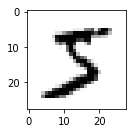

In [103]:
import numpy as np
import gzip
import matplotlib.pyplot as plt

# Open the training images
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# Open the training labels
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()

# Reshape the training images to an array of 60000, of which the picture is 28 by 28 pixels.
# The pixels are divided by 255 so that the algorithm will be more accurate when taking in numbers from range 
#  0-1 instead of 0-255
# The pixels are also flipped around with the ~ symbol so that the foreground will be black and the 
#  background will be white
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0

# The training labels are put into a list, starting from position 8 in the array, ignorning the metadata
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

# Display the first image in the training image array
plt.subplot(221)
plt.imshow(train_img[0], cmap=plt.get_cmap('gray'))

### 2. Fix the random seed

The random seed is fixed so that the results can be reproduced.

In [104]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### 3. Flatten the input

The training dataset is structured as a 3d array of instance, image width and image height. For a "multi-layer perceptron model" we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

In [105]:
# reshape into one linear input of pixels
inputs = train_img.reshape(60000, 784)

### 4. Encode the variables categorically 

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, we should encode the class values, transforming the vector of class integers into a binary matrix.

In [106]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


### 5. Create Model

We will now create our simple model.The model will be created using the Sequential() model built into keras.

The model is a simple neural network with one hidden layer and the same number of neurons as there are inputs (784). The input layer uses a linear activation function.

The softmax activation dunction is used on the output layer. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.


In [107]:
# Import keras.
import keras as kr

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with an input layer with 784.
model.add(kr.layers.Dense(784, activation='linear', input_dim=784, kernel_initializer='normal'))
# Add the output layer
model.add(kr.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 6. Fit the model

Now, we will fit the model. The model has 2 epochs, so the training will run twice, and update every 100 images.

This step might take a about half a minute depending on the CPU/GPU capabilities on the user's machine.

In [108]:
# fit the model
model.fit(inputs, outputs, epochs=2, batch_size=100)


Epoch 1/2
60000/60000 [==============================] - 17s 284us/step - loss: 5.2659 - acc: 0.5911
Epoch 2/2
60000/60000 [==============================] - 15s 256us/step - loss: 3.4042 - acc: 0.7059


### 7. Test the model

Finally, we can test the model. We will first read in the test datasets using gzip.

Next, the predict() function will determine if the test image will match the test label. The number of test images predicted correctly is printed out.

In [109]:
# read the test images dataset
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# read the test labels dataset
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
# reshape the test images array into the correct shape and format as the train array
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
# The test labels are put into a list, starting from position 8 in the array, ignorning the metadata
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

# get sum of correct predictions
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()


8165

### 8. Further testing

This test is to see the accuracy of the model in predicting a random image in the test dataset. We will pick the tenth image.

In [110]:
print(encoder.inverse_transform(model.predict(test_img[17:18])))


[7]


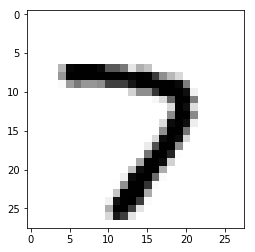

In [111]:
import matplotlib.pyplot as plt

plt.imshow(test_img[17].reshape(28, 28), cmap='gray')


We can see that the model is accurate enough to predict the number 7 from the test image.

### 9.Conclusion from first trial

From the results of the first trial, we can conclude that the model is working at about 80% accuracy. It made 8165 correct predictions and predicted digit of the random image correctly.

80% is a good start, but we want to try to get the system up to a 99% accuracy.

## Second trial

### 1. Setting up a new model

In the first trial model, we used a linear activation. Through research, I've found that switiching the activation to relu will drastically improve performance.

Relu, or Rectified Linear Unit is the improved linear activations. It basically includes a max value and threshold to return a more accurate prediction.

In [142]:
# Start a neural network, building it by layers.
model2 = kr.models.Sequential()

# Add a hidden layer with an input layer with 784 with activation RELU
model2.add(kr.layers.Dense(784, activation='relu', input_dim=784, kernel_initializer='normal'))
# Add the output layer
model2.add(kr.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

# Build the graph.
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 2. More epochs
The new model will be set to 10 epochs, so the training will run ten times, and update every 100 images.

This step will take 5 times longer to train the model.

In [143]:
# fit the model
model2.fit(inputs, outputs, epochs=10, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.5544 - acc: 0.8379
Epoch 2/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.3161 - acc: 0.9057
Epoch 3/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.2499 - acc: 0.9247
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.2021 - acc: 0.9399
Epoch 5/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.1737 - acc: 0.9479
Epoch 6/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.1479 - acc: 0.9555
Epoch 7/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.1353 - acc: 0.9587
Epoch 8/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1206 - acc: 0.9631
Epoch 9/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1162 - acc: 0.9643
Epoch 10/10
60000/60000 [==============================] - 18s 295us/step - loss: 

### 3. Testing new model

We will run the new model by using the same test data set.

In [144]:
# read the test images dataset
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# read the test labels dataset
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
# reshape the test images array into the correct shape and format as the train array
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
# The test labels are put into a list, starting from position 8 in the array, ignorning the metadata
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

# get sum of correct predictions
(encoder.inverse_transform(model2.predict(test_img)) == test_lbl).sum()


9664

### 4. Conclusion from Second Trial

From the results, we can observe a big jump in effciency of the new model. The model predicted 9646 images correctly compared to 8165 from the first model. 

The model is about 96% accurate, but takes a longer time to train the neural network.


## Third trial

### 1. Setting up new model with more layers

This time, we will set up the model with new layers. In the previous models, the models were set up with an input layer and output layer. 

In [121]:
# Start a neural network, building it by layers.
model3 = kr.models.Sequential()

# Add a hidden layer with 600 neuros and  with input 784 with activation RELU
model3.add(kr.layers.Dense(units=600, activation='relu', input_dim=784, kernel_initializer='normal'))
# Add second hidden layer with 600 neuros and  with input 784 with activation RELU
model3.add(kr.layers.Dense(units = 400, activation='relu', kernel_initializer='normal'))
# Add the output layer
model3.add(kr.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

# Build the graph.
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 2. Decreasing batch size

Now, we will fit the model with a batch size of 50, instead of 100. The model has 10 epochs, so the training will ten times, and update every 50 images.

In [124]:
model3.fit(inputs, outputs, epochs=10, batch_size=50)

Epoch 1/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.1219 - acc: 0.9613
Epoch 2/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.0992 - acc: 0.9679
Epoch 3/10
60000/60000 [==============================] - 32s 528us/step - loss: 0.0904 - acc: 0.9706
Epoch 4/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0826 - acc: 0.9729
Epoch 5/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0729 - acc: 0.9755
Epoch 6/10
60000/60000 [==============================] - 31s 523us/step - loss: 0.0714 - acc: 0.9765
Epoch 7/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0729 - acc: 0.9763
Epoch 8/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.0656 - acc: 0.9779
Epoch 9/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0663 - acc: 0.9780
Epoch 10/10
60000/60000 [==============================] - 31s 523us/step - loss: 

3. Testing new model
We will run the new model by using the same test data set.

In [125]:
# read the test images dataset
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# read the test labels dataset
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
# reshape the test images array into the correct shape and format as the train array
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
# The test labels are put into a list, starting from position 8 in the array, ignorning the metadata
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

# get sum of correct predictions
(encoder.inverse_transform(model3.predict(test_img)) == test_lbl).sum()


9705

### 4. Conclusion from Third Trial

From the results, we can observe a small jump in effeciency of the new model. The model predicted 9705 images correctly compared to 9646 from the 2nd model. 

The model is about 97% accurate, but it took a long time to train the model.

## Results Analysis and Conclusion

From our results, we managed to achieve about 97% accuracy. This is slightly below the target percentage accuracy of 99%, but it's still a feat using a simple linear network.

For future research, the model should be set up with a **Simple Convolutional Neural Network [6]** which will take a bit more time to set up, but is more sophisticated and accurate.

Below is the results of our research in graphical form. It is based of our previous experiments, as well as few others with different variables.

Case A: Linear Activations, Epochs 2,  hidden layer 1, Batch size 100 <br>
Case B: Relu Activations,   Epochs 2,  hidden layer 1, Batch size 100 <br>
Case C: Relu Activations,   Epochs 10, hidden layer 1, Batch size 100<br>
Case D: Relu Activations,   Epochs 10, hidden layer 2, Batch size 100<br>
Case E: Relu Activations,   Epochs 10, hidden layer 2, Batch size 50<br>

The most effective change came from Changing the Linear activations to relu activations, and changing the epochs from 2 to 10

Finally, thanks to Dr Ian McLoughlin for supplying most of the **code snippets [7]** that can be found on his github.

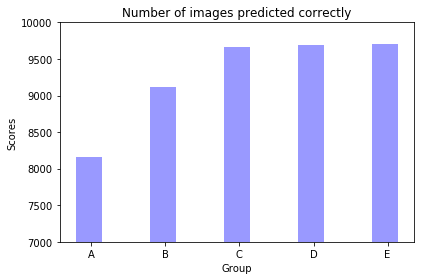

In [145]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

# 5 cases
n_groups = 5

# Set scores
score = (8165, 9110, 9664, 9689, 9705)
fig, ax = plt.subplots()

# format table
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index, score, bar_width,
                alpha=opacity, color='b',
                 error_kw=error_config,
                )

# plot table
plt.ylim(7000,10000)
ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Number of images predicted correctly')
ax.set_xticks(index + bar_width / 10)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
fig.tight_layout()
plt.show()

## References
1. Simple explanation on supervised vs unsupervised machine learning - https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/
2. MNIST Database Website - http://yann.lecun.com/exdb/mnist/
3. Explanation on the MNIST database and how to read it in memory - https://github.com/yonjeremy/emerging-technologies-assesment/blob/master/mnist-dataset.ipynb
4. Official Keras documentation website - https://keras.io/
5. Explanation on Activations - https://keras.io/activations/
6. Good guide on Convolutional neural networks  - https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
7. Code snippets from here - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb